# Using Prophet Model to Predict Time Series Data: Wikipedia Page Views

We will be forecasting the number of page views for the "Thanksgiving" Wikipedia article in November, with the assistance of a time series model called Prophet.

## Setup

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

## Part 1: Preparing Data

In [9]:
! wget -nc https://storage.googleapis.com/penn-cis5450/thanksgiving.csv

File ‘thanksgiving.csv’ already there; not retrieving.



In [10]:
thanksgiving_df = pd.read_csv("thanksgiving.csv")
thanksgiving_df["Date"] = pd.to_datetime(thanksgiving_df["Date"])

In [11]:
thanksgiving_df = thanksgiving_df.rename(columns={'Date': 'ds', 'Views': 'y'})

In [12]:
start_date = pd.to_datetime('2022-11-01')
df = thanksgiving_df[thanksgiving_df['ds'] < start_date]
thanksgiving_train = thanksgiving_df[thanksgiving_df['ds'] < start_date].reset_index(drop=True)
thanksgiving_test = thanksgiving_df[thanksgiving_df['ds'] >= start_date].reset_index(drop=True)

##Part 2: Prophet Model

We will be exploring the Prophet model and comparing **two types of models**; one where we do not account for holidays (Thanksgiving is a U.S. holiday), and one where we do account for holidays.

### 2.1 Prophet Model (Base)

In [13]:
m = Prophet()
m.fit(thanksgiving_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52sv583_/e26_lne_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52sv583_/7dy2n3l3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55515', 'data', 'file=/tmp/tmp52sv583_/e26_lne_.json', 'init=/tmp/tmp52sv583_/7dy2n3l3.json', 'output', 'file=/tmp/tmp52sv583_/prophet_modelwakcer71/prophet_model-20231230195521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future_df = m.make_future_dataframe(periods = 30)
future_df = m.predict(future_df)
future_df = future_df[['ds', 'yhat']]
future_df = future_df[future_df['ds'] >= start_date].reset_index(drop=True)

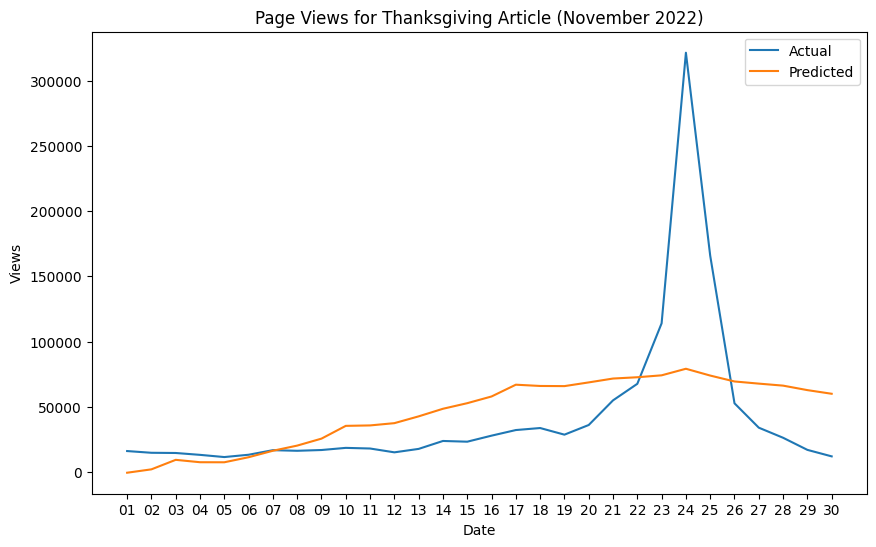

In [15]:
plt.figure(figsize=(10, 6))
merged_df = future_df.merge(thanksgiving_test, on='ds').sort_values(by='ds')
merged_df['ds'] = merged_df['ds'].dt.strftime('%d')
plt.plot(merged_df['ds'], merged_df['y'], label='Actual')
plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title("Page Views for Thanksgiving Article (November 2022)")
plt.legend()
plt.show()

### 2.2 Prophet Model (Holiday)

In [16]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(thanksgiving_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52sv583_/77wx1ju4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52sv583_/yfhdo3mh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88209', 'data', 'file=/tmp/tmp52sv583_/77wx1ju4.json', 'init=/tmp/tmp52sv583_/yfhdo3mh.json', 'output', 'file=/tmp/tmp52sv583_/prophet_model3jztkayr/prophet_model-20231230195529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future_holiday_df = m.make_future_dataframe(periods = 30)
future_holiday_df = m.predict(future_holiday_df)
future_holiday_df = future_holiday_df[['ds', 'yhat']]
future_holiday_df = future_holiday_df[future_holiday_df['ds'] >= start_date].reset_index(drop=True)

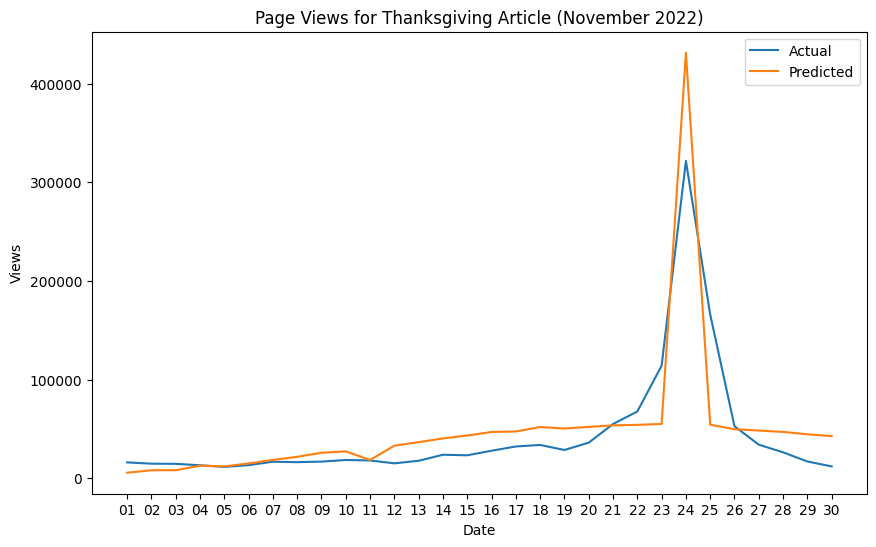

In [18]:
plt.figure(figsize=(10, 6))
merged_df = future_holiday_df.merge(thanksgiving_test, on='ds').sort_values(by='ds')
merged_df['ds'] = merged_df['ds'].dt.strftime('%d')
plt.plot(merged_df['ds'], merged_df['y'], label='Actual')
plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title("Page Views for Thanksgiving Article (November 2022)")
plt.legend()
plt.show()

**Much better!**